In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import seaborn as sns

In [2]:
# Loading data
data = pd.read_csv('dataset/Cleaned_data.csv')

In [3]:
# Select only specific columns
selected_columns = ['AGE', 'SEX', 'DDIAGISC', 'DDIAGHA', 'STYPE', 'DPE', 'DVT14', 'DRSISC', 'DRSH', 'DASP14', 'DOAC',
                   'DGORM', 'DMH14', 'RHEP24', 'RASP3', 'FAP', 'FOAC', 'DASPLT', 'DHAEMD', 'DCAREND', 'DTHROMB', 'OCCODE']
data_selected = data[selected_columns]

# <p style="background-color:#101820ff;font-family:newtimeroman;color:#f2fa4cff;font-size:150%;text-align:center;border-radius:10px 10px;">Feature Scaling</p>

In [4]:
# Copy Dataset
ds = data.copy()

In [5]:
#Convert numerical to categorical value using binning method ~OPTION ~2
#Youth=15 to 24, Adults=25 to 64 Seniors= 65 and above
ds['AGE'] = pd.cut(ds['AGE'], bins=[14,24,64,101], labels=['Youth','Adults','Seniors'])
ds['AGE'] = ds['AGE'].astype('object')

In [6]:
# Categorical Encoding using One Hot Encoding 
one_hot_encoded_data = pd.get_dummies(ds, columns = ['RCONSC', 'FPLACE','OCCODE','STYPE'])
ds = one_hot_encoded_data.copy() 

In [7]:
# Change the value of 1 and 0 to Yes or No after one hot encoding
To_transform = ['RCONSC_Drowsy','RCONSC_Fully_Alert','RCONSC_Unconscious','FPLACE_Home','FPLACE_Nursing_Home',
               'FPLACE_Other_Hospital_Dept', 'FPLACE_Relative_Home', 'FPLACE_Residential_Care', 'FPLACE_Unknown',
               'OCCODE_Deceased', 'OCCODE_Dependent', 'OCCODE_Fully_Recovered', 'OCCODE_Not_recovered',
               'STYPE_LACS', 'STYPE_OTH', 'STYPE_PACS', 'STYPE_POCS', 'STYPE_TACS']

for i in To_transform:
    ds[i] = ds[i].map({0: 'No', 1: 'Yes'})
    ds[i] = ds[i].astype('object')

In [8]:
#Get list of categorical variables
s = (ds.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['AGE', 'SEX', 'RVISINF', 'RDEF1', 'RDEF2', 'RDEF3', 'RDEF4', 'RDEF5', 'RDEF6', 'RDEF7', 'RDEF8', 'DDIAGISC', 'DDIAGHA', 'DPE', 'DVT14', 'DRSISC', 'DRSH', 'DASP14', 'DOAC', 'DGORM', 'DMH14', 'RHEP24', 'RASP3', 'FAP', 'FOAC', 'DASPLT', 'DHAEMD', 'DCAREND', 'DTHROMB', 'DALIVE', 'CMPLASP', 'CMPLHEP', 'RCONSC_Drowsy', 'RCONSC_Fully_Alert', 'RCONSC_Unconscious', 'FPLACE_Home', 'FPLACE_Nursing_Home', 'FPLACE_Other_Hospital_Dept', 'FPLACE_Relative_Home', 'FPLACE_Residential_Care', 'FPLACE_Unknown', 'OCCODE_Deceased', 'OCCODE_Dependent', 'OCCODE_Fully_Recovered', 'OCCODE_Not_recovered', 'STYPE_LACS', 'STYPE_OTH', 'STYPE_PACS', 'STYPE_POCS', 'STYPE_TACS']


In [9]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    ds[i]=ds[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

All features are now numerical


In [10]:
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns)
print("All features are now scaled")

All features are now scaled


# <p style="background-color:#101820ff;font-family:newtimeroman;color:#f2fa4cff;font-size:150%;text-align:center;border-radius:10px 10px;">Dimensionality Reduction</p>

#### Dimension Reduction using Principal Component Analysis 

In [11]:
#Initiating PCA to reduce dimensions aka features to 2
pca = PCA(n_components=2)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=['pca_1', 'pca_2'])

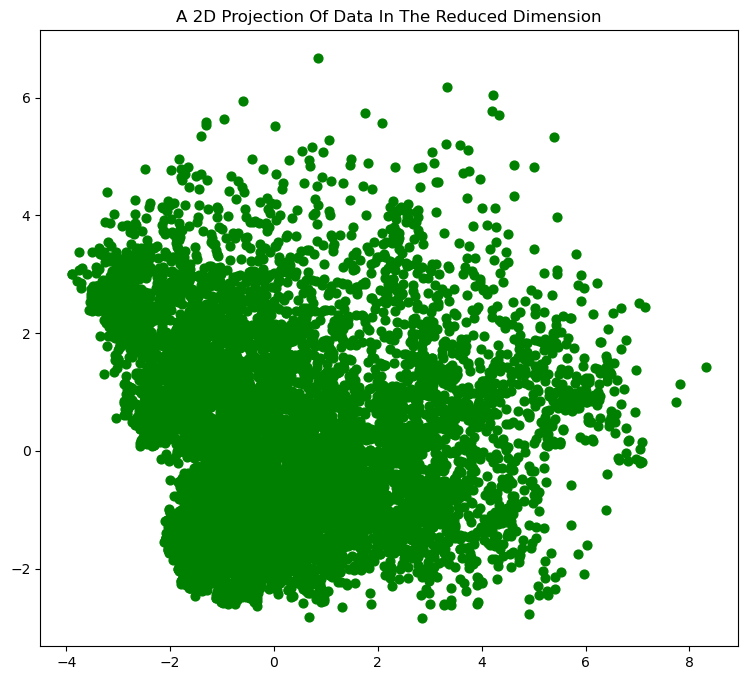

In [14]:
#A 2D Projection Of Data In The Reduced Dimension
x = PCA_ds['pca_1']
y = PCA_ds['pca_2']


#To plot
fig = plt.figure(figsize=(9, 8))
ax = fig.add_subplot(111)
ax.scatter(x, y, s=40, c='green', marker='o')
ax.set_title('A 2D Projection Of Data In The Reduced Dimension')
plt.show()

# <p style="background-color:#101820ff;font-family:newtimeroman;color:#f2fa4cff;font-size:150%;text-align:center;border-radius:10px 10px;">Clustering</p>

In [15]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score

from sklearn.cluster import AgglomerativeClustering, DBSCAN, Birch
from sklearn.mixture import GaussianMixture

from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

from matplotlib.colors import ListedColormap
import matplotlib.cm as cm
import matplotlib.style as style

# BIRCH

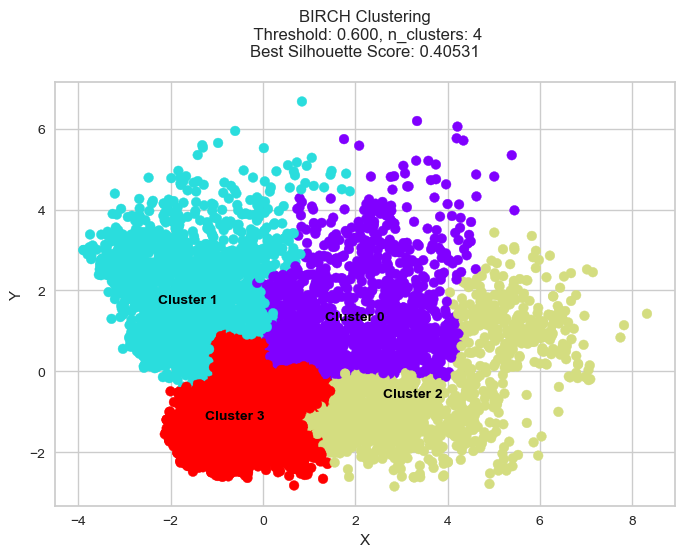

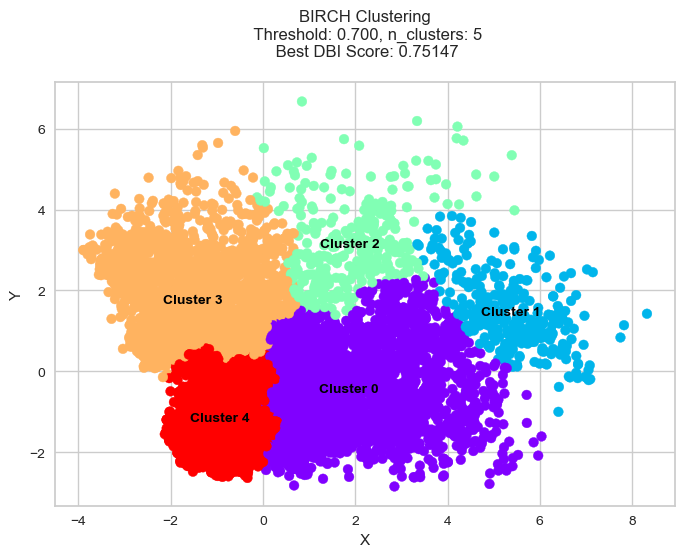

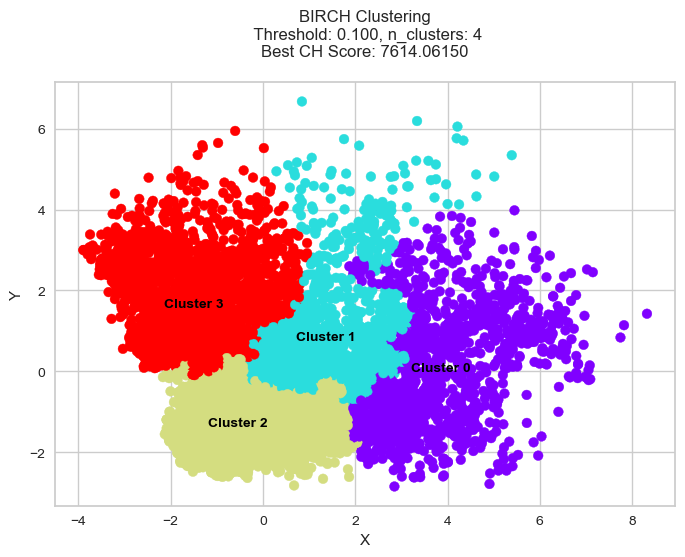

In [17]:
# Define parameter ranges
min_cluster_range = range(4, 10)
threshold_range = np.arange(0.1, 1.1, 0.1)

best_silhouette_score = float('-inf')
best_silhouette_cluster = []

best_dbi_score = float('inf')
best_dbi_cluster = []

best_calinski_score = -float('inf')
best_calinski_cluster = []

best_si_threshold = 0.0
best_dbi_threshold = 0.0
best_calinski_threshold = 0.0

best_si_min_cluster = None
best_dbi_min_cluster = None
best_calinski_min_cluster = None

# Perform Birch clustering with varying parameters and find the best scores
for i, min_cluster in enumerate(min_cluster_range):
    for j, threshold in enumerate(threshold_range):
        birch = Birch(n_clusters=min_cluster, threshold=threshold)
        y_pred = birch.fit_predict(PCA_ds)
        silhouette = silhouette_score(PCA_ds, y_pred)
        dbi = davies_bouldin_score(PCA_ds, y_pred)
        calinski = calinski_harabasz_score(PCA_ds, y_pred)

        if silhouette > best_silhouette_score:
            best_silhouette_score = silhouette
            best_silhouette_cluster = y_pred.copy()
            best_si_threshold = threshold
            best_si_min_cluster = min_cluster
            
        if dbi < best_dbi_score:
            best_dbi_score = dbi
            best_dbi_cluster = y_pred.copy()
            best_dbi_threshold = threshold
            best_dbi_min_cluster = min_cluster
            
        if calinski > best_calinski_score:
            best_calinski_score = calinski
            best_calinski_cluster = y_pred.copy()
            best_calinski_threshold = threshold
            best_calinski_min_cluster = min_cluster
            
# Plot the clusters with the best Silhouette Score
plt.scatter(x, y, c=best_silhouette_cluster, cmap='rainbow')
plt.xlabel('X')
plt.ylabel('Y')
unique_labels = set(best_silhouette_cluster)
for label in unique_labels:
    if label == -1:
        # Noise points are labeled as -1
        continue
    xy = PCA_ds[best_silhouette_cluster == label]
    centroid = np.mean(xy, axis=0)
    plt.annotate(f'Cluster {label}', centroid, color='black', weight='bold',
                 fontsize=10, ha='center', va='center')
plt.title(f'BIRCH Clustering\n Threshold: {best_si_threshold:.3f}, n_clusters: {best_si_min_cluster}\nBest Silhouette Score: {best_silhouette_score:.5f}\n')
plt.show()

# Plot the clusters with the best DBI Score
plt.scatter(x, y, c=best_dbi_cluster, cmap='rainbow')
plt.xlabel('X')
plt.ylabel('Y')
unique_labels = set(best_dbi_cluster)
for label in unique_labels:
    if label == -1:
        # Noise points are labeled as -1
        continue
    xy = PCA_ds[best_dbi_cluster == label]
    centroid = np.mean(xy, axis=0)
    plt.annotate(f'Cluster {label}', centroid, color='black', weight='bold',
                 fontsize=10, ha='center', va='center')
plt.title(f'BIRCH Clustering\n Threshold: {best_dbi_threshold:.3f}, n_clusters: {best_dbi_min_cluster}\n Best DBI Score: {best_dbi_score:.5f}\n')
plt.show()

# Plot the clusters with the best Calinski Harabasz Score
plt.scatter(x, y, c=best_calinski_cluster, cmap='rainbow')
plt.xlabel('X')
plt.ylabel('Y')
unique_labels = set(best_calinski_cluster)
for label in unique_labels:
    if label == -1:
        # Noise points are labeled as -1
        continue
    xy = PCA_ds[best_calinski_cluster == label]
    centroid = np.mean(xy, axis=0)
    plt.annotate(f'Cluster {label}', centroid, color='black', weight='bold',
                 fontsize=10, ha='center', va='center')
plt.title(f'BIRCH Clustering\n Threshold: {best_calinski_threshold:.3f}, n_clusters: {best_calinski_min_cluster}\nBest CH Score: {best_calinski_score:.5f}\n')
plt.show()

# AGGLOMERATIVE

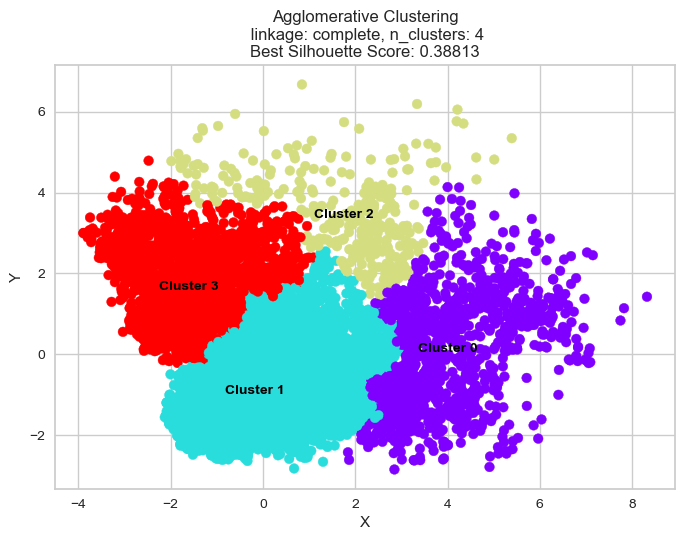

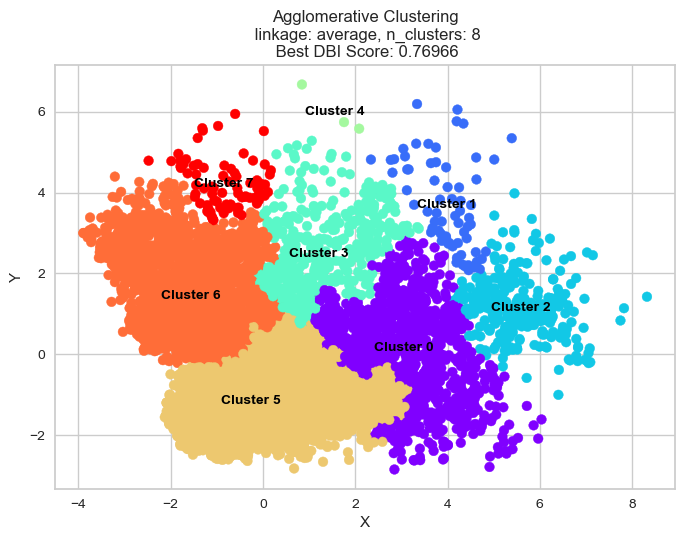

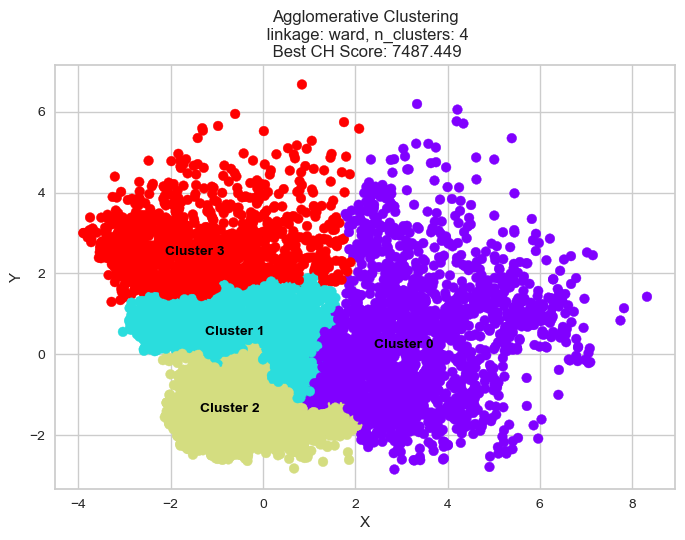

In [15]:
# Define parameter ranges
min_cluster_range = range(4, 10)
linkage_methods = ['ward', 'average', 'complete']

best_silhouette_score = float('-inf')
best_silhouette_cluster = []

best_dbi_score = float('inf')
best_dbi_cluster = []

best_calinski_score = 0
best_calinski_cluster = []

best_si_linkage = None
best_dbi_linkage = None
best_calinski_linkage = None

best_si_n_cluster = None
best_dbi_n_cluster = None
best_calinski_n_cluster = None

# Perform Agglomerative Clustering with varying parameters and find the best scores
for i, min_cluster in enumerate(min_cluster_range):
    for j, linkage in enumerate(linkage_methods):
        agg_clustering = AgglomerativeClustering(n_clusters=min_cluster, linkage=linkage)
        y_pred = agg_clustering.fit_predict(PCA_ds)
        silhouette = silhouette_score(PCA_ds, y_pred)
        dbi = davies_bouldin_score(PCA_ds, y_pred)
        calinski = calinski_harabasz_score(PCA_ds, y_pred)
        
        if silhouette > best_silhouette_score:
            best_silhouette_score = silhouette
            best_silhouette_cluster = y_pred.copy()
            best_si_linkage = linkage
            best_si_min_cluster = min_cluster
            
        if dbi < best_dbi_score:
            best_dbi_score = dbi
            best_dbi_cluster = y_pred.copy()
            best_dbi_linkage = linkage
            best_dbi_min_cluster = min_cluster
            
        if calinski > best_calinski_score:
            best_calinski_score = calinski
            best_calinski_cluster = y_pred.copy()
            best_calinski_linkage = linkage
            best_calinski_min_cluster = min_cluster

# Plot the clusters with the best Silhouette Score
plt.scatter(x, y, c=best_silhouette_cluster, cmap='rainbow')
plt.xlabel('X')
plt.ylabel('Y')
unique_labels = set(best_silhouette_cluster)
for label in unique_labels:
    if label == -1:
        # Noise points are labeled as -1
        continue
    xy = PCA_ds[best_silhouette_cluster == label]
    centroid = np.mean(xy, axis=0)
    plt.annotate(f'Cluster {label}', centroid, color='black', weight='bold',
                 fontsize=10, ha='center', va='center')
plt.title(f'Agglomerative Clustering\n linkage: {best_si_linkage}, n_clusters: {best_si_min_cluster}\nBest Silhouette Score: {best_silhouette_score:.5f}')
plt.show()

# Plot the clusters with the best DBI Score
plt.scatter(x, y, c=best_dbi_cluster, cmap='rainbow')
plt.xlabel('X')
plt.ylabel('Y')
unique_labels = set(best_dbi_cluster)
for label in unique_labels:
    if label == -1:
        # Noise points are labeled as -1
        continue
    xy = PCA_ds[best_dbi_cluster == label]
    centroid = np.mean(xy, axis=0)
    plt.annotate(f'Cluster {label}', centroid, color='black', weight='bold',
                 fontsize=10, ha='center', va='center')
plt.title(f'Agglomerative Clustering\n linkage: {best_dbi_linkage}, n_clusters: {best_dbi_min_cluster}\n Best DBI Score: {best_dbi_score:.5f}')
plt.show()

# Plot the clusters with the best Calinski Harabasz Score
plt.scatter(x, y, c=best_calinski_cluster, cmap='rainbow')
plt.xlabel('X')
plt.ylabel('Y')
unique_labels = set(best_calinski_cluster)
for label in unique_labels:
    if label == -1:
        # Noise points are labeled as -1
        continue
    xy = PCA_ds[best_calinski_cluster == label]
    centroid = np.mean(xy, axis=0)
    plt.annotate(f'Cluster {label}', centroid, color='black', weight='bold',
                 fontsize=10, ha='center', va='center')
plt.title(f'Agglomerative Clustering\n linkage: {best_calinski_linkage}, n_clusters: {best_calinski_min_cluster}\n Best CH Score: {best_calinski_score:.3f}')
plt.show()

# Gaussian Mixture

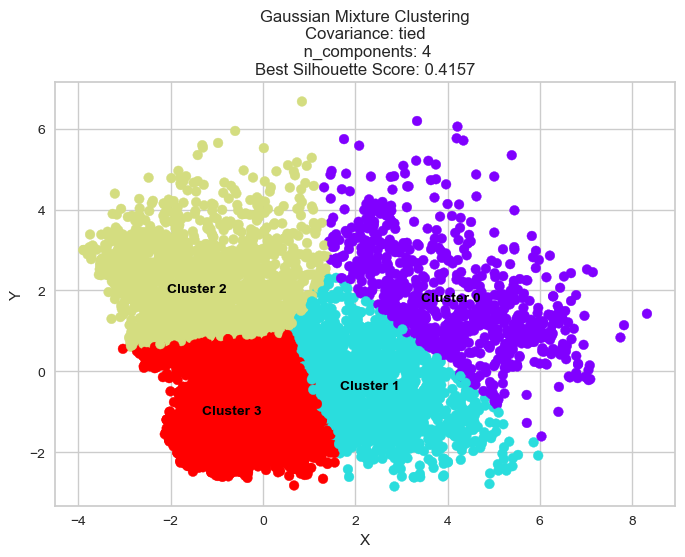

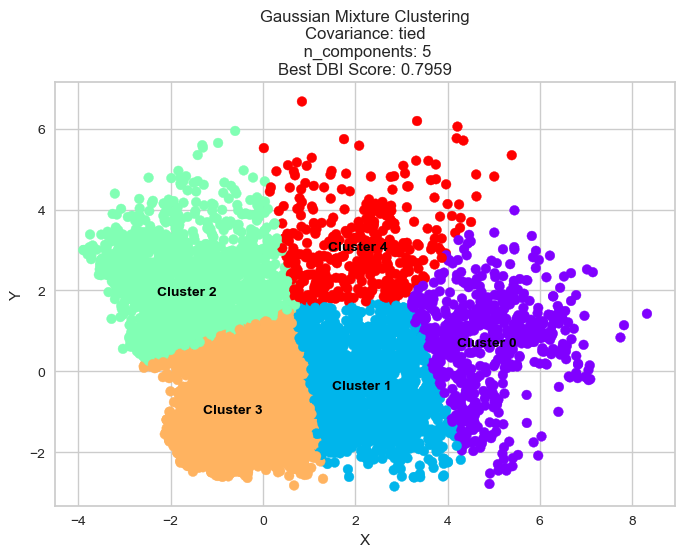

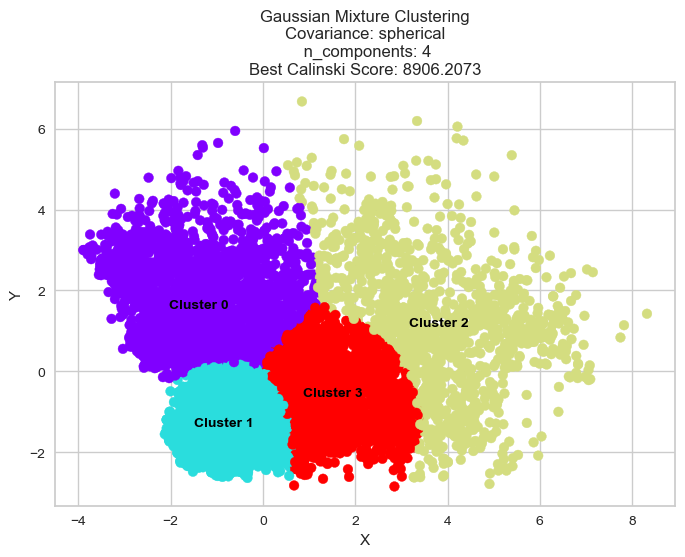

In [16]:
# Define parameter ranges
n_components_range = range(4, 10)
covariance_types = ['full', 'tied', 'diag', 'spherical']
#covariance_types = ['spherical']

best_silhouette_score = float('-inf')
best_silhouette_cluster = []

best_dbi_score = float('inf')
best_dbi_cluster = []

best_calinski_score = -float('inf')
best_calinski_cluster = []

best_si_covariance = None
best_dbi_covariance = None
best_calinski_covariance = None

best_si_components = None
best_dbi_components = None
best_calinski_components = None

# Perform Gaussian Mixture clustering with varying parameters and find the best scores
for i, n_components in enumerate(n_components_range):
    for j, covariance_type in enumerate(covariance_types):
        gm = GaussianMixture(n_components=n_components, covariance_type=covariance_type)
        gm.fit(PCA_ds)
        y_pred = gm.predict(PCA_ds)
        silhouette = silhouette_score(PCA_ds, y_pred)
        dbi = davies_bouldin_score(PCA_ds, y_pred)
        calinski = calinski_harabasz_score(PCA_ds, y_pred)

        if silhouette > best_silhouette_score:
            best_silhouette_score = silhouette
            best_silhouette_cluster = y_pred.copy()
            best_si_covariance = covariance_type
            best_si_components =  n_components

        if dbi < best_dbi_score:
            best_dbi_score = dbi
            best_dbi_cluster = y_pred.copy()
            best_dbi_covariance = covariance_type
            best_dbi_components = n_components
        
        if calinski > best_calinski_score:
            best_calinski_score = calinski
            best_calinski_cluster = y_pred.copy()
            best_calinski_covariance = covariance_type
            best_calinski_components = n_components

# Plot the clusters with the best Silhouette Score
plt.scatter(x, y, c=best_silhouette_cluster, cmap='rainbow')
plt.xlabel('X')
plt.ylabel('Y')
unique_labels = set(best_silhouette_cluster)
for label in unique_labels:
    xy = PCA_ds[best_silhouette_cluster == label]
    centroid = np.mean(xy, axis=0)
    plt.annotate(f'Cluster {label}', centroid, color='black', weight='bold',
                 fontsize=10, ha='center', va='center')
plt.title(f'Gaussian Mixture Clustering\nCovariance: {best_si_covariance}\n n_components: {best_si_components}\nBest Silhouette Score: {best_silhouette_score:.4f}')
plt.show()

# Plot the clusters with the best DBI Score
plt.scatter(x, y, c=best_dbi_cluster, cmap='rainbow')
plt.xlabel('X')
plt.ylabel('Y')
unique_labels = set(best_dbi_cluster)
for label in unique_labels:
    xy = PCA_ds[best_dbi_cluster == label]
    centroid = np.mean(xy, axis=0)
    plt.annotate(f'Cluster {label}', centroid, color='black', weight='bold',
                 fontsize=10, ha='center', va='center')
plt.title(f'Gaussian Mixture Clustering\nCovariance: {best_dbi_covariance}\n n_components: {best_dbi_components}\nBest DBI Score: {best_dbi_score:.4f}')
plt.show()

# Plot the clusters with the best DBI Score
plt.scatter(x, y, c=best_calinski_cluster, cmap='rainbow')
plt.xlabel('X')
plt.ylabel('Y')
unique_labels = set(best_calinski_cluster)
for label in unique_labels:
    xy = PCA_ds[best_calinski_cluster == label]
    centroid = np.mean(xy, axis=0)
    plt.annotate(f'Cluster {label}', centroid, color='black', weight='bold',
                 fontsize=10, ha='center', va='center')
plt.title(f'Gaussian Mixture Clustering\nCovariance: {best_calinski_covariance}\n n_components: {best_calinski_components}\nBest Calinski Score: {best_calinski_score:.4f}')
plt.show()

# <p style="background-color:#101820ff;font-family:newtimeroman;color:#f2fa4cff;font-size:150%;text-align:center;border-radius:10px 10px;">Saving Clusters to Dataset</p>

### Clustering using Gaussian Mixture
* n_components = 4
* covariance_type = spherical

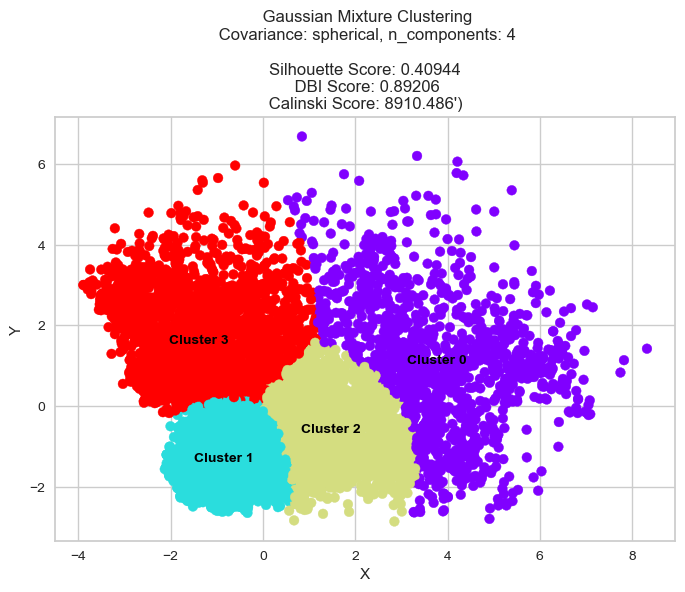

In [18]:
clustered_ds = data.copy()

n_clusters = 4
covariance = 'spherical'
# Gaussian Mixture
gm = GaussianMixture(n_components=n_clusters, covariance_type=covariance)
y_pred = gm.fit_predict(PCA_ds)
clustered_ds['GAUSSIAN'] = gm_result

silhouette = silhouette_score(PCA_ds, y_pred)
dbi = davies_bouldin_score(PCA_ds, y_pred)
calinski = calinski_harabasz_score(PCA_ds, y_pred)
        
# saving dataset for data visualization of clustered data
clustered_ds.to_csv('dataset/Clustered_GM.csv', index=False)

# Plot the clusters
plt.scatter(x, y, c=y_pred, cmap='rainbow')
plt.xlabel('X')
plt.ylabel('Y')
unique_labels = set(y_pred)
for label in unique_labels:
    xy = PCA_ds[y_pred == label]
    centroid = np.mean(xy, axis=0)
    plt.annotate(f'Cluster {label}', centroid, color='black', weight='bold',
                 fontsize=10, ha='center', va='center')
long_title = f''' Gaussian Mixture Clustering\n Covariance: {covariance}, n_components: {n_clusters}\n 
Silhouette Score: {silhouette:.5f}\n DBI Score: {dbi:.5f}\n Calinski Score: {calinski:.3f}') '''
plt.title(long_title)
plt.show()

In [20]:
import seaborn as sns

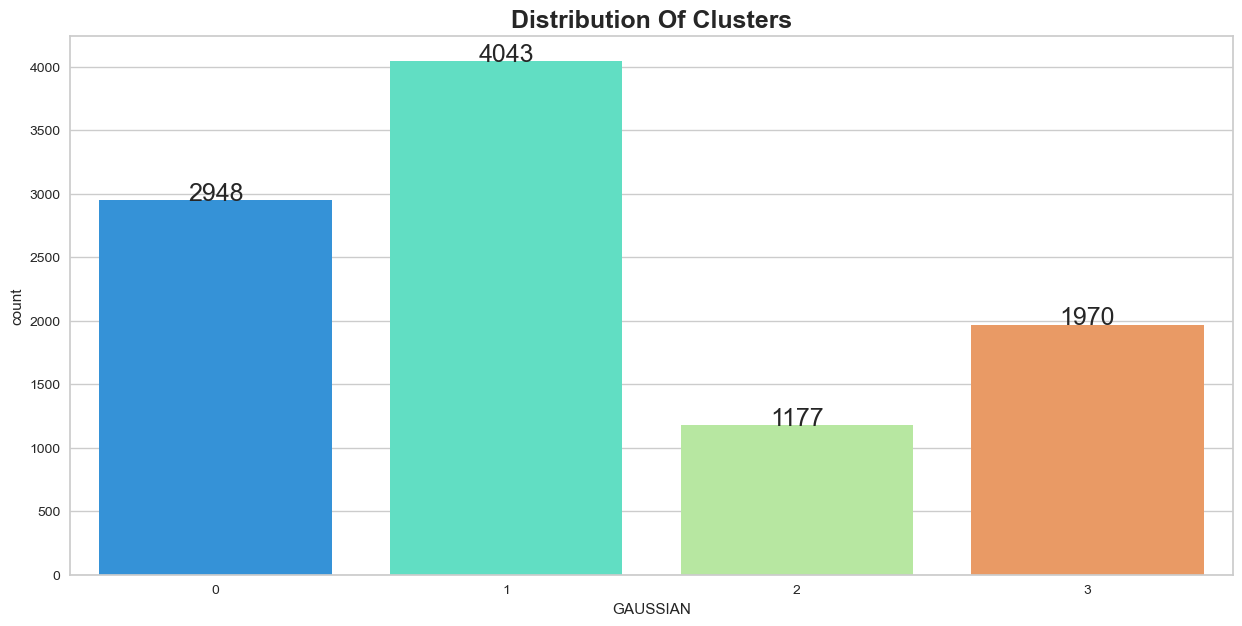

In [26]:
countplt, ax = plt.subplots(figsize = (15,7))
ax = sns.countplot(x=clustered_ds["GAUSSIAN"], palette='rainbow')
ax.set_title("Distribution Of Clusters",fontsize = 18, fontweight='bold')
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 18)